In [1]:
import pandas as pd #dataframe
import seaborn as sb #graphs
from matplotlib import pyplot as plt #graphics
import numpy as np # for mean, variance, and unique
%matplotlib inline

In [2]:
#read in the data
data = pd.read_csv('mergesort.csv')

In [3]:
#show the first 10 rows
display(data.head(10))

,Number of Threads,Time Taken
0,1,0.001111
1,1,0.000738
2,1,0.000687
3,1,0.000698
4,1,0.000781
5,1,0.000693
6,1,0.001047
7,1,0.001084
8,1,0.000765
9,1,0.000596


In [4]:
#show the last instances of duplicates
dupes = data.duplicated(keep='last')
display(dupes)


# we keep duplicates because even though they are unlikely to have the same value, it is still possible for different tests to have the same value

0       False
1        True
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [5]:
# Show statistical information about the data in the dataset
display(data.describe())

,Number of Threads,Time Taken
count,5000.0,5000.000000
mean,1.0,0.000590
std,0.0,0.000046
min,1.0,0.000562
25%,1.0,0.000574
50%,1.0,0.000579
75%,1.0,0.000589
max,1.0,0.002116


In [6]:
# Show statistical information about the representation of the dataset
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Number of Threads  5000 non-null   int64  
 1   Time Taken         5000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 78.3 KB


None

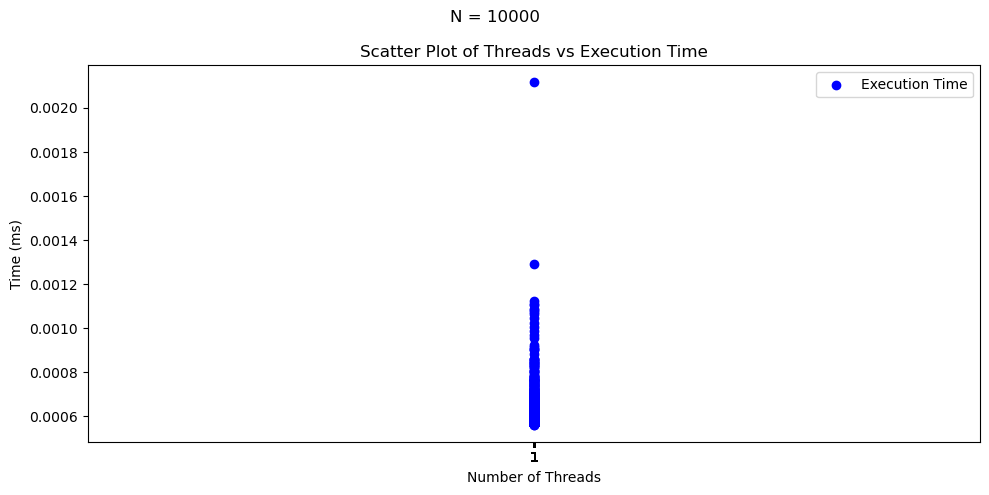

In [ ]:
#Scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(x=data["Number of Threads"], y=data["Time Taken"], color='blue', label='Execution Time')
plt.title('Scatter Plot of Threads vs Execution Time')
plt.suptitle("N = 10000")
plt.xlabel('Number of Threads')
plt.ylabel('Time (ms)')
# plt.yticks(data["Time Taken"])
plt.xticks(data["Number of Threads"])
plt.legend()
plt.tight_layout()
plt.show()

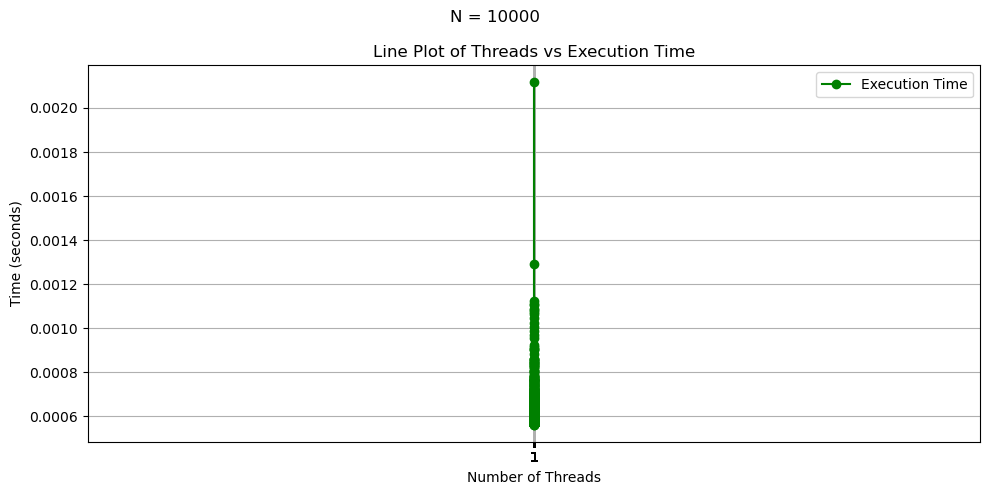

In [8]:
# Line plot
plt.figure(figsize=(10, 5))
plt.suptitle("N = 10000")
plt.plot(data["Number of Threads"], data["Time Taken"], marker='o', linestyle='-', color='green', label='Execution Time')
plt.title('Line Plot of Threads vs Execution Time')
plt.xlabel('Number of Threads')
plt.ylabel('Time (seconds)')
# plt.yticks(data["Time Taken"])
plt.xticks(data["Number of Threads"])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

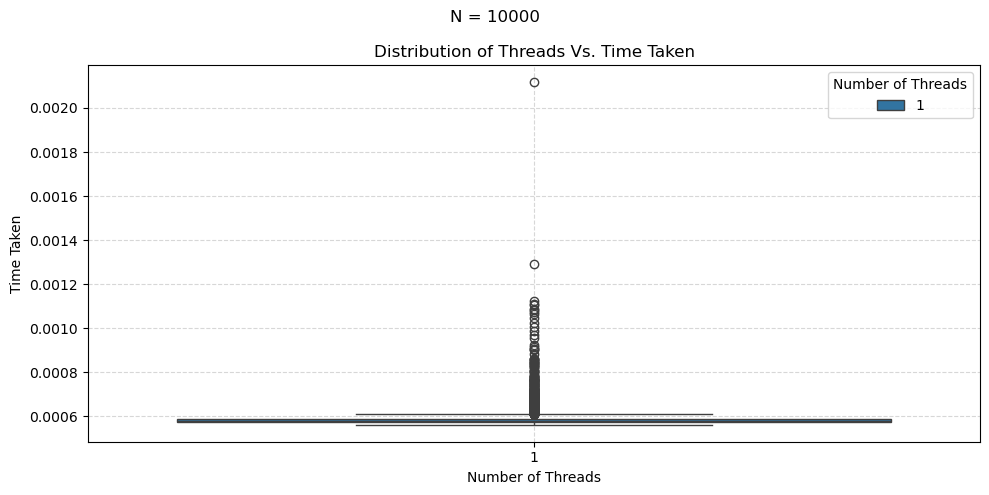

In [9]:
# make a boxplot for each feature except Outcome to spot outliers
plt.figure(figsize=(10, 5))
for col in data.drop(columns=["Number of Threads"]):
    plot = sb.boxplot(y=data[col], x=data["Number of Threads"], hue=data["Number of Threads"])
    plt.suptitle("N = 10000")
    plot.set_title("Distribution of Threads Vs. Time Taken")
    plot.set_xlabel("Number of Threads")
    plot.set_ylabel("Time Taken")
    plt.grid(True, which='both', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

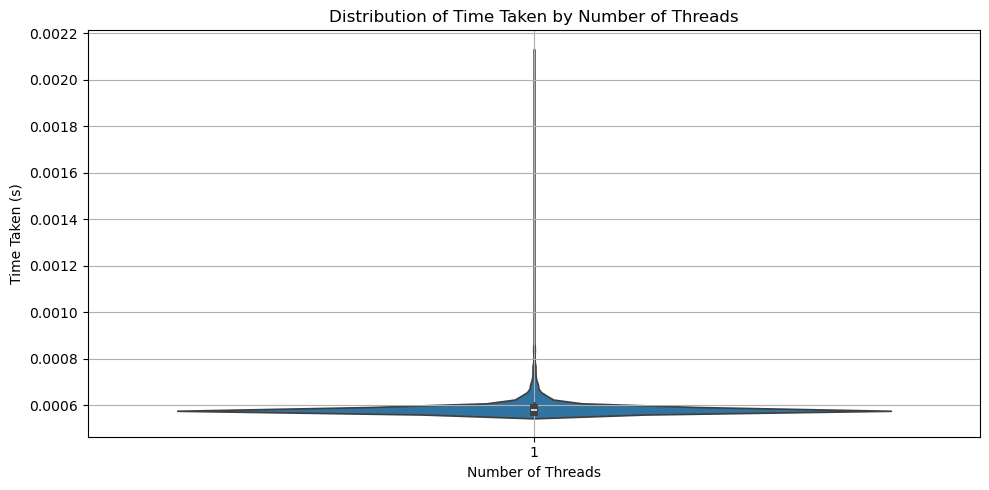

In [10]:
#violin plot
plt.figure(figsize=(10, 5))
sb.violinplot(x='Number of Threads', y='Time Taken', data=data)
plt.xlabel('Number of Threads')
plt.ylabel('Time Taken (s)')
plt.title('Distribution of Time Taken by Number of Threads')
plt.grid(True)
plt.tight_layout()
plt.show()

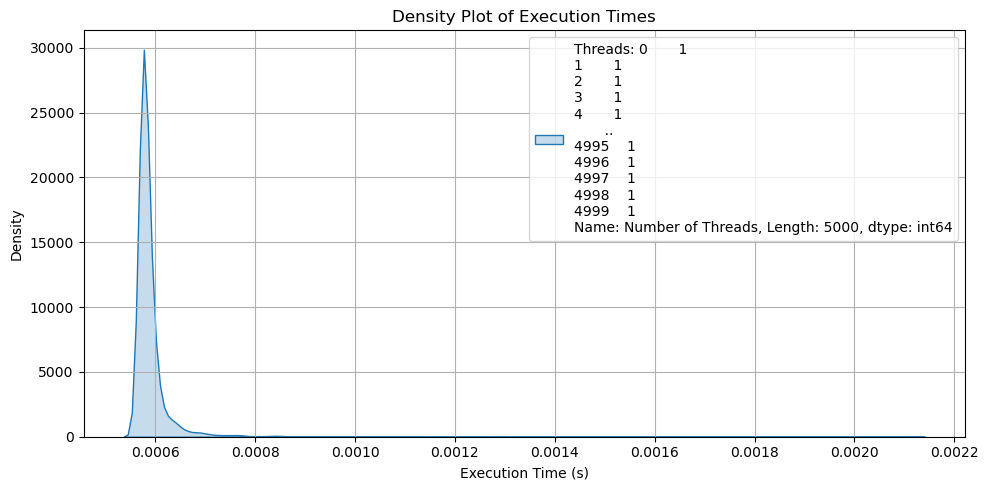

In [11]:
#density plot
plt.figure(figsize=(10, 5))
sb.kdeplot(data=data["Time Taken"], label=f'Threads: {data["Number of Threads"]}', fill=True)
plt.xlabel('Execution Time (s)')
plt.ylabel('Density')
plt.title('Density Plot of Execution Times')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

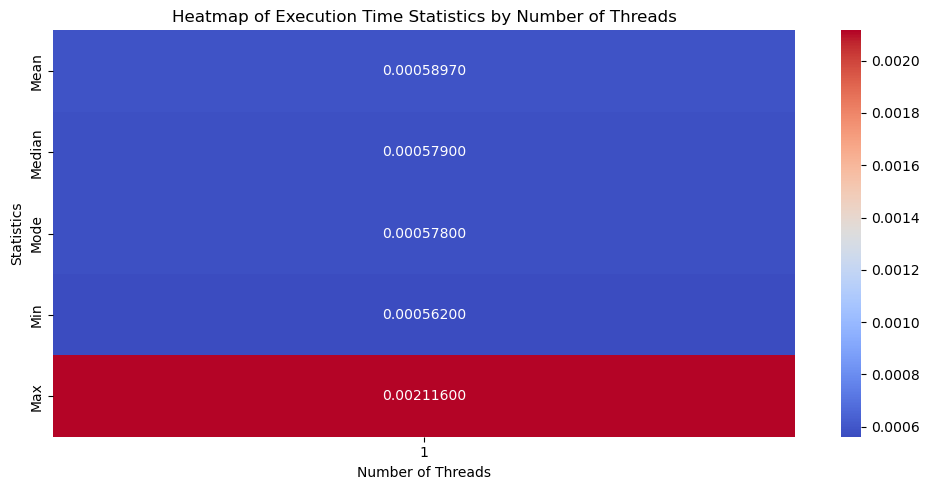

In [12]:
# stats heatmap
stats = data.groupby('Number of Threads')['Time Taken'].agg(['mean', 'median', lambda x: x.mode()[0], 'min', 'max'])
stats.columns = ['Mean', 'Median', 'Mode', 'Min', 'Max']

plt.figure(figsize=(10, 5))
sb.heatmap(stats.T, annot=True, fmt=".8f", cmap="coolwarm", xticklabels=stats.index, yticklabels=stats.columns)
plt.xlabel('Number of Threads')
plt.ylabel('Statistics')
plt.title('Heatmap of Execution Time Statistics by Number of Threads')
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

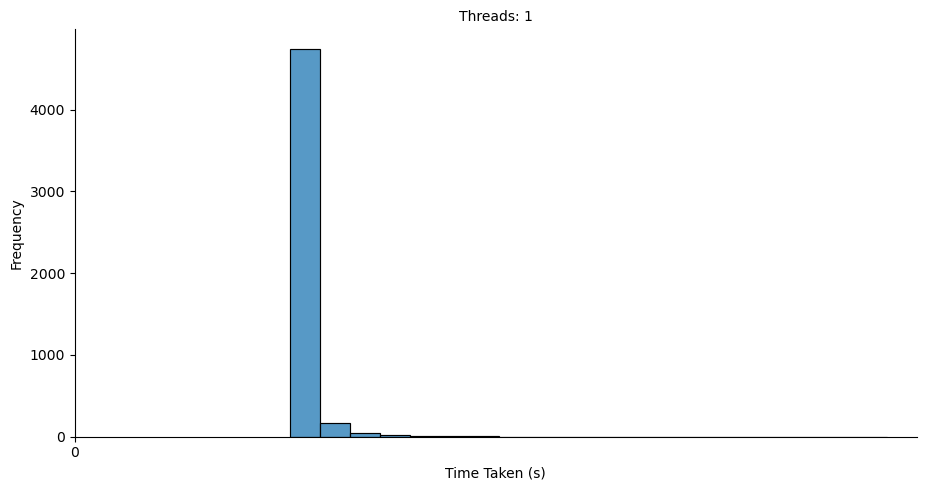

In [13]:
plt.figure(figsize=(10, 5))
g = sb.FacetGrid(data, col="Number of Threads", col_wrap=3, sharex=True, sharey=True)
g.map(sb.histplot, "Time Taken", bins=20)
g.set_axis_labels("Time Taken (s)", "Frequency")
g.set_titles("Threads: {col_name}")
g.figure.subplots_adjust(top=0.9)
g.figure.set_size_inches(26.5,5)
for ax in g.axes.flatten():
    ax.set_xticks(range(0, int(data["Time Taken"].max()) + 1, 5)) 
g.figure.tight_layout()
plt.tight_layout()
plt.show()

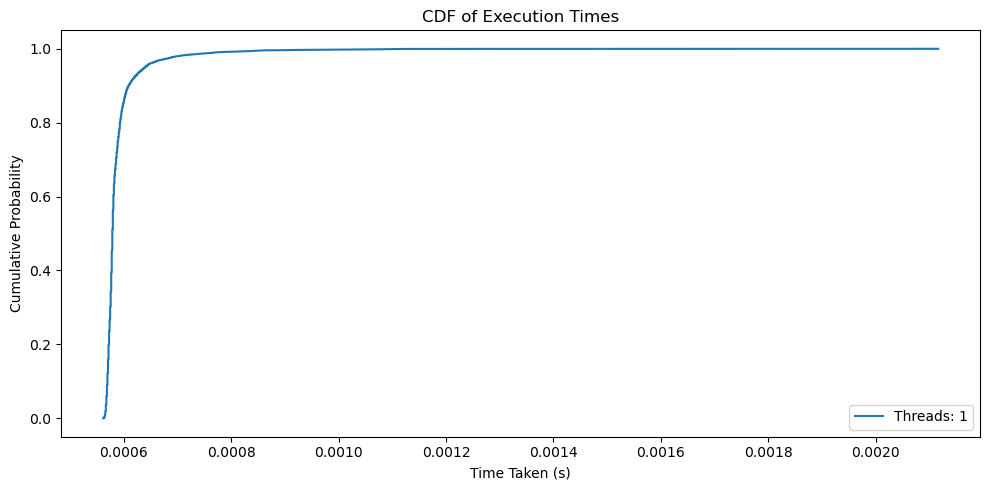

In [14]:
plt.figure(figsize=(10, 5))
for thread in data['Number of Threads'].unique():
    subset = data[data['Number of Threads'] == thread]['Time Taken']
    sorted_times = np.sort(subset)
    cdf = np.arange(len(sorted_times)) / len(sorted_times)
    plt.plot(sorted_times, cdf, label=f'Threads: {thread}')

plt.xlabel('Time Taken (s)')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Execution Times')
plt.legend()
plt.tight_layout()
plt.show()